<a href="https://colab.research.google.com/github/JustifiedTB/group-project-1/blob/main/Group_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 2023_world_prosperity.csv to 2023_world_prosperity (1).csv
Saving cost_of_living_indices3.csv to cost_of_living_indices3 (1).csv
Saving Global Country Development & Prosperity Index.csv to Global Country Development & Prosperity Index (1).csv
Saving Hospital_Ranking_Data_2023.csv to Hospital_Ranking_Data_2023 (1).csv
Saving WHR2023.csv to WHR2023 (1).csv
Saving world-data-2023.csv to world-data-2023 (1).csv


In [ ]:
happy_df = pd.read_csv('WHR2023.csv')
development_df = pd.read_csv('Global Country Development & Prosperity Index.csv')
cost_of_living_df = pd.read_csv('cost_of_living_indices3.csv')
world_data_df = pd.read_csv('world-data-2023.csv')
hosp_rank_df = pd.read_csv('Hospital_Ranking_Data_2023.csv')
world_prosp_df = pd.read_csv('2023_world_prosperity.csv')

In [ ]:
display(happy_df.info())
happy_df.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                137 non-null    object 
 1   Ladder score                                137 non-null    float64
 2   Standard error of ladder score              137 non-null    float64
 3   upperwhisker                                137 non-null    float64
 4   lowerwhisker                                137 non-null    float64
 5   Logged GDP per capita                       137 non-null    float64
 6   Social support                              137 non-null    float64
 7   Healthy life expectancy                     136 non-null    float64
 8   Freedom to make life choices                137 non-null    float64
 9   Generosity                                  137 non-null    float64
 10  Perceptions of

None

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363
1,Denmark,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,0.196,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084
2,Iceland,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,0.668,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250
3,Israel,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691
4,Netherlands,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,0.379,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110
5,Sweden,7.395,0.037,7.468,7.322,10.883,0.939,72.150,0.948,0.165,0.202,1.778,1.921,1.510,0.562,0.754,0.225,0.520,1.903
6,Norway,7.315,0.044,7.402,7.229,11.088,0.943,71.500,0.947,0.141,0.283,1.778,1.994,1.521,0.544,0.752,0.212,0.463,1.829
7,Switzerland,7.240,0.043,7.324,7.156,11.164,0.920,72.900,0.891,0.027,0.266,1.778,2.022,1.463,0.582,0.678,0.151,0.475,1.870
8,Luxembourg,7.228,0.069,7.363,7.093,11.660,0.879,71.675,0.915,0.024,0.345,1.778,2.200,1.357,0.549,0.710,0.149,0.418,1.845
9,New Zealand,7.123,0.038,7.198,7.048,10.662,0.952,70.350,0.887,0.175,0.271,1.778,1.842,1.544,0.513,0.672,0.230,0.471,1.852


In [ ]:
# Cleaning Happiness Dataframe

# List of columns to drop
columns_to_drop = ['Standard error of ladder score', 'upperwhisker', 'lowerwhisker']

# Drop the specified columns from the DataFrame
happy_cleaned = happy_df.drop(columns=columns_to_drop)

# Display the cleaned DataFrame
happy_cleaned.head()


,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.804,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363
1,Denmark,7.586,10.962,0.954,71.250,0.934,0.134,0.196,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084
2,Iceland,7.530,10.896,0.983,72.050,0.936,0.211,0.668,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250
3,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691
4,Netherlands,7.403,10.942,0.930,71.550,0.887,0.213,0.379,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110


In [ ]:
# Scaling the data

from sklearn.preprocessing import MinMaxScaler

columns = ['Logged GDP per capita', 'Social support', 'Healthy life expectancy',
           'Freedom to make life choices', 'Generosity', 'Perceptions of corruption',
           'Ladder score']

# Scale the columns to a range of 1 to 10 for all countries
scaler = MinMaxScaler(feature_range=(1, 10))
happy_scaled_df = happy_df.copy()
happy_scaled_df[columns] = scaler.fit_transform(happy_df[columns])

<ipython-input-45-3da506e2b83b>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors1 = cm.get_cmap('tab20', 20).colors
<ipython-input-45-3da506e2b83b>:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors2 = cm.get_cmap('tab20c', 20).colors


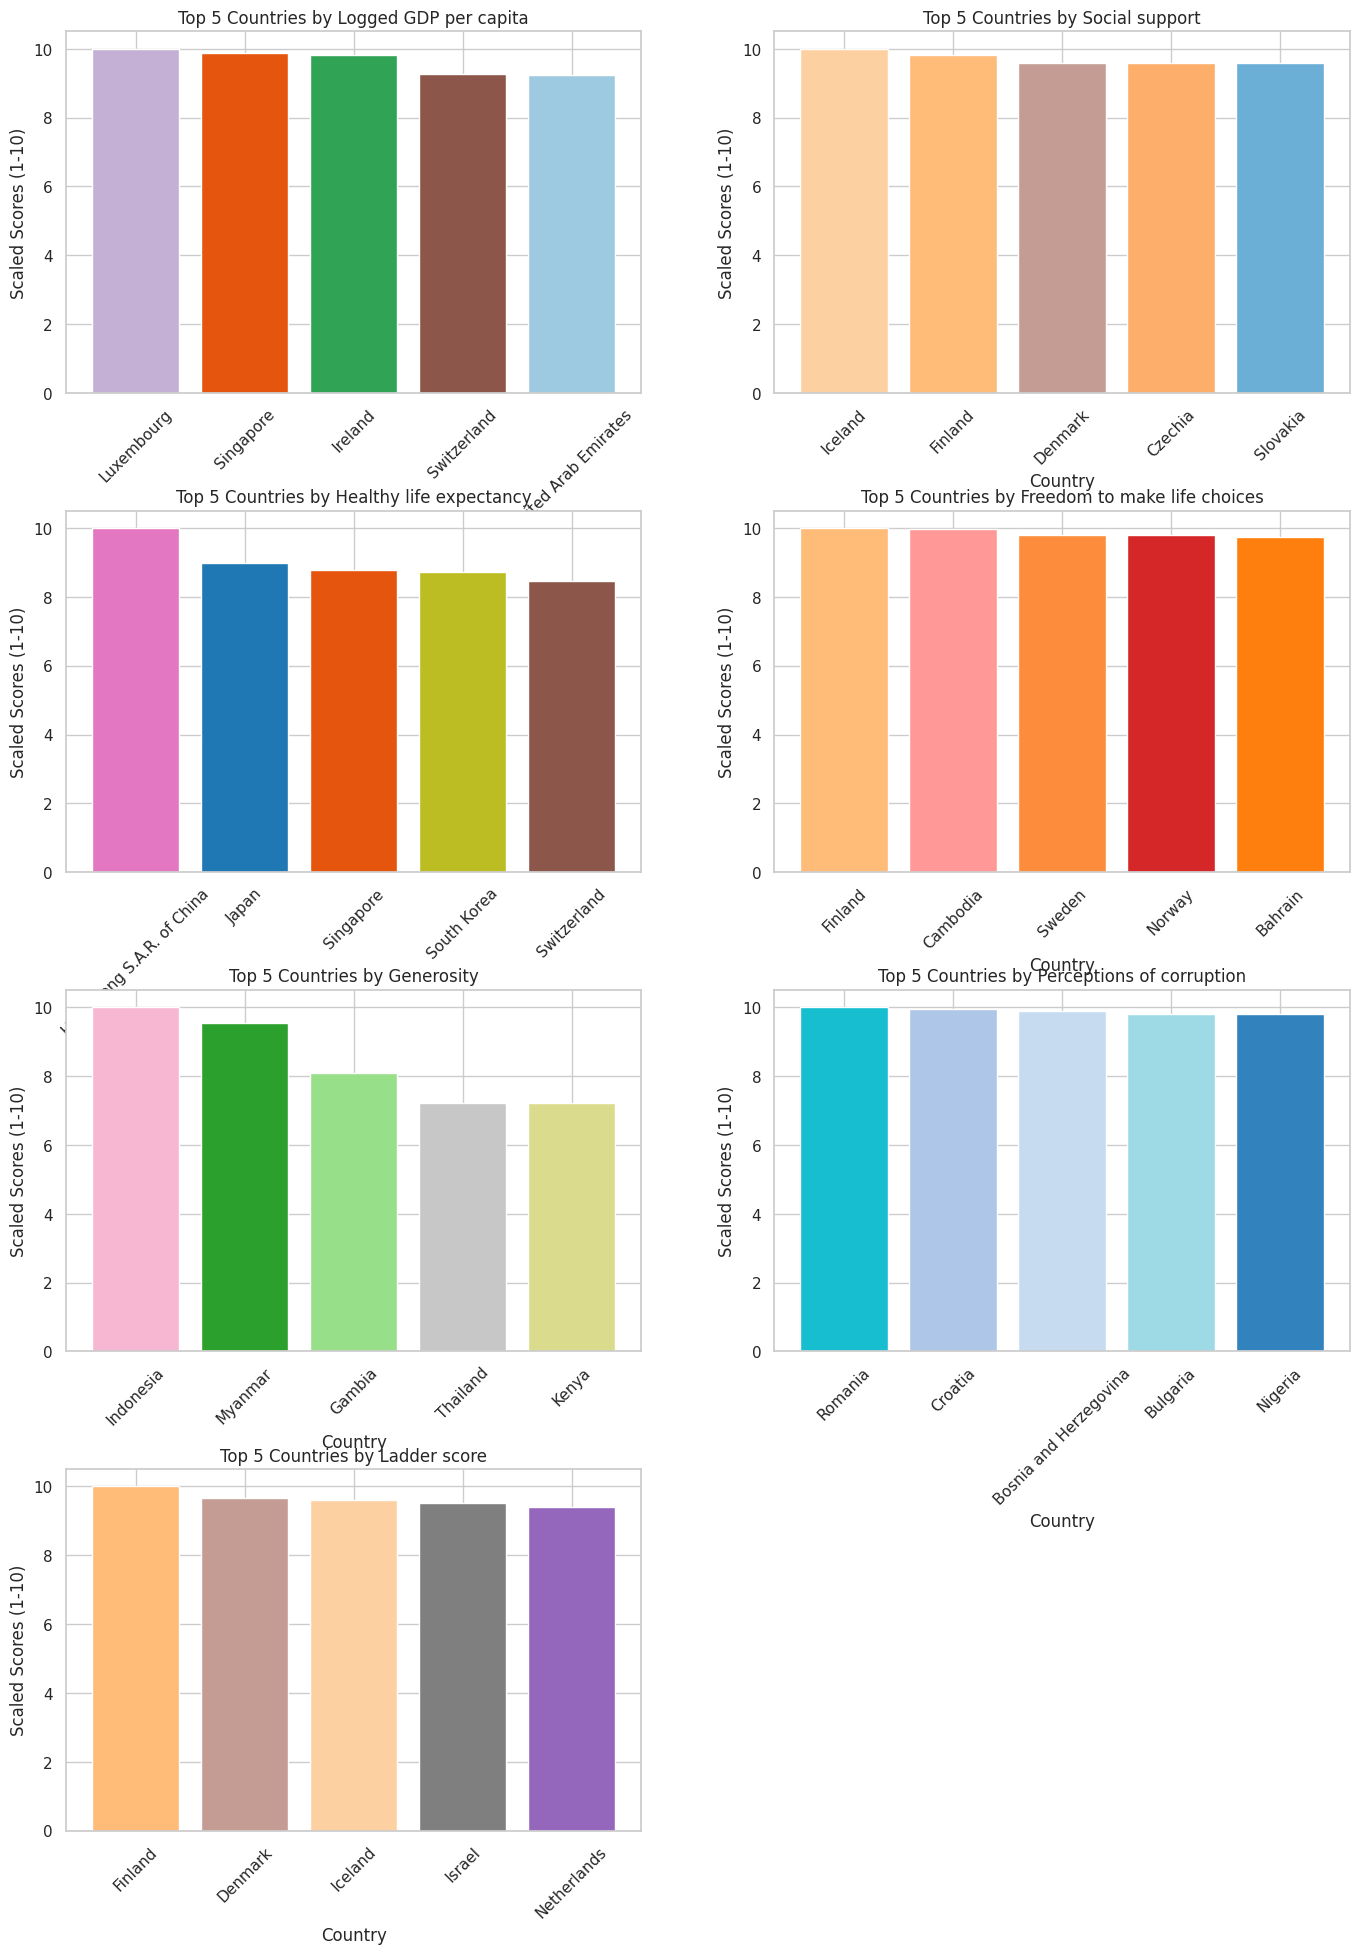

In [ ]:
# Visualizing Top 5 countries for 6 determinant columns

import seaborn as sns
import matplotlib.cm as cm
from itertools import cycle

# Step 1: Create a list of all countries that appear in the top five for each column
top_countries = set()
for col in columns:
    top_countries.update(happy_scaled_df.nlargest(5, col)['Country name'])

# Step 2: Assign each unique country a color from tab20 and then tab20c if needed
colors1 = cm.get_cmap('tab20', 20).colors
colors2 = cm.get_cmap('tab20c', 20).colors
all_colors = list(colors1) + list(colors2)
color_map = {country: color for country, color in zip(top_countries, all_colors)}

# Step 3: Function to plot top 5 countries for a given column
def plot_top5(df, column, ax):
    top5 = df[['Country name', column]].nlargest(5, column)
    colors = [color_map[country] for country in top5['Country name']]
    ax.bar(top5['Country name'], top5[column], color=colors)
    ax.set_xlabel('Country')
    ax.set_ylabel('Scaled Scores (1-10)')
    ax.set_title(f'Top 5 Countries by {column}')
    ax.tick_params(axis='x', rotation=45)

# Create subplots
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
fig.tight_layout(pad=5.0)

# Loop through each column and create a bar graph
for i, col in enumerate(columns):
    ax = axes[i // 2, i % 2]
    plot_top5(happy_scaled_df, col, ax)

# Remove the empty subplot
fig.delaxes(axes[3, 1])

# Show plot
plt.show()

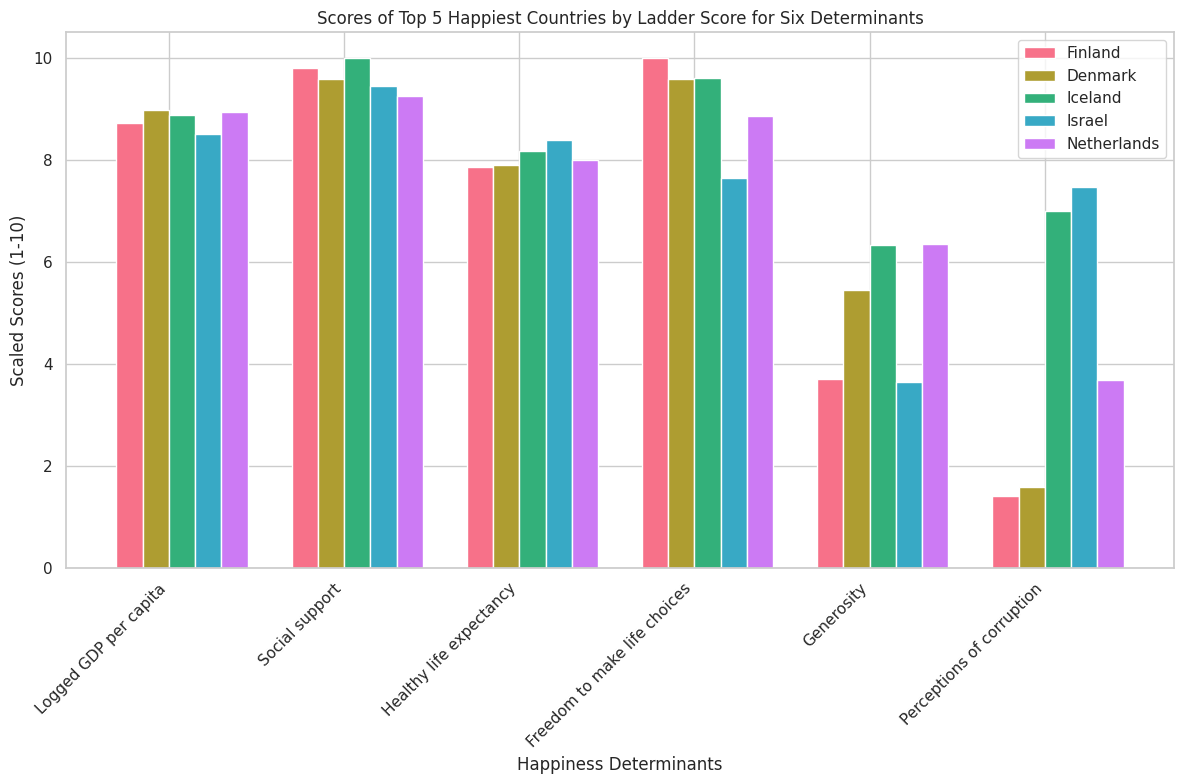

In [ ]:
# Visualizing the Top5 Happiest Countries in the 6 Determinant Categories

top_countries = ['Finland', 'Denmark', 'Iceland', 'Israel', 'Netherlands']
columns_to_plot = ['Logged GDP per capita', 'Social support', 'Healthy life expectancy',
                   'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']


# Filter the dataframe for the top countries
top_df_scaled = happy_scaled_df[happy_scaled_df['Country name'].isin(top_countries)]

# Plotting
plt.figure(figsize=(12, 8))
bar_width = 0.15
x = range(len(columns_to_plot))

# Set a color palette
colors = sns.color_palette("husl", len(top_countries))

# Create bars for each country
for i, (country, color) in enumerate(zip(top_countries, colors)):
    plt.bar([p + bar_width * i for p in x],
            top_df_scaled[top_df_scaled['Country name'] == country][columns_to_plot].values.flatten(),
            width=bar_width, label=country, color=color)

# Add ticks and labels
plt.xlabel('Happiness Determinants')
plt.ylabel('Scaled Scores (1-10)')
plt.title('Scores of Top 5 Happiest Countries by Ladder Score for Six Determinants')
plt.xticks([p + 1.5 * bar_width for p in x], columns_to_plot, rotation=45, ha='right')
plt.legend(top_countries)
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
display(development_df.info())
development_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     167 non-null    object 
 1   AveragScore                 167 non-null    float64
 2   SafetySecurity              167 non-null    float64
 3   PersonelFreedom             167 non-null    float64
 4   Governance                  167 non-null    float64
 5   SocialCapital               167 non-null    float64
 6   InvestmentEnvironment       167 non-null    float64
 7   EnterpriseConditions        167 non-null    float64
 8   MarketAccessInfrastructure  167 non-null    float64
 9   EconomicQuality             167 non-null    float64
 10  LivingConditions            167 non-null    float64
 11  Health                      167 non-null    float64
 12  Education                   167 non-null    float64
 13  NaturalEnvironment          167 non

None

,Country,AveragScore,SafetySecurity,PersonelFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment
0,Denmark,84.55,92.59,94.09,89.45,82.56,82.42,79.64,78.79,76.81,95.77,81.07,87.48,73.94
1,Sweden,83.67,90.97,91.90,86.41,78.29,82.81,75.54,79.67,76.18,95.33,82.28,85.92,78.74
2,Norway,83.59,93.30,94.10,89.66,79.03,82.24,75.95,75.87,77.25,94.70,82.98,85.68,72.37
3,Finland,83.47,89.56,91.96,90.41,77.27,84.12,77.25,78.77,70.28,94.46,81.19,88.38,77.99
4,Switzerland,83.42,95.66,87.50,87.67,69.14,80.81,83.84,78.65,79.71,94.66,82.11,87.72,73.60
5,Netherlands,82.32,91.19,90.08,87.34,74.03,84.11,79.09,80.82,74.34,95.86,82.05,86.43,62.49
6,Luxembourg,81.83,96.32,89.20,86.31,66.60,78.91,80.72,80.03,76.93,94.56,81.59,78.79,71.98
7,Iceland,81.02,91.64,88.74,83.30,77.75,79.20,72.86,76.07,69.92,93.82,82.72,85.19,71.01
8,Germany,80.81,87.92,87.70,84.39,65.96,78.87,79.70,80.23,73.96,94.42,81.41,83.45,71.69
9,New Zealand,80.47,85.07,87.56,87.19,79.88,82.58,72.82,74.60,69.88,90.66,79.84,83.89,71.71


In [ ]:
development_df.columns
# Maybe need renaming

Index(['Country', 'AveragScore', 'SafetySecurity', 'PersonelFreedom',
       'Governance', 'SocialCapital', 'InvestmentEnvironment',
       'EnterpriseConditions', 'MarketAccessInfrastructure', 'EconomicQuality',
       'LivingConditions', 'Health', 'Education', 'NaturalEnvironment'],
      dtype='object')

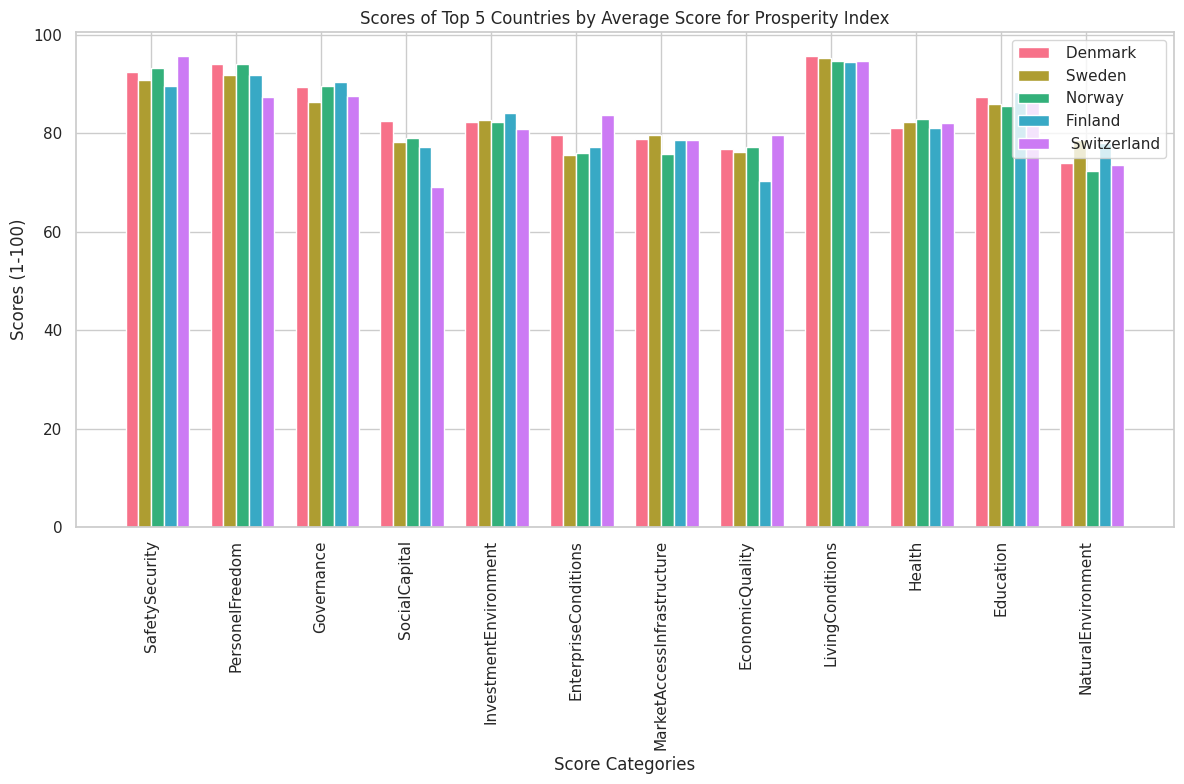

In [ ]:
# Get the list of top 5 countries
top_5_prosp = development_df.sort_values('AveragScore', ascending=False).head(5)
top_countries_prosp = top_5_prosp['Country'].tolist()

prosp_columns_to_plot = ['SafetySecurity', 'PersonelFreedom',
       'Governance', 'SocialCapital', 'InvestmentEnvironment',
       'EnterpriseConditions', 'MarketAccessInfrastructure', 'EconomicQuality',
       'LivingConditions', 'Health', 'Education', 'NaturalEnvironment']

# Plotting
plt.figure(figsize=(12, 8))
bar_width = 0.15
x = range(len(prosp_columns_to_plot))

# Set a color palette
colors = sns.color_palette("husl", len(top_countries_prosp))

# Create bars for each country
for i, (country, color) in enumerate(zip(top_countries_prosp, colors)):
    plt.bar([p + bar_width * i for p in x],
            top_5_prosp[top_5_prosp['Country'] == country][prosp_columns_to_plot].values.flatten(),
            width=bar_width, label=country, color=color)

# Add ticks and labels
plt.xlabel('Score Categories')
plt.ylabel('Scores (1-100)')
plt.title('Scores of Top 5 Countries by Average Score for Prosperity Index')
plt.xticks([p + 1.5 * bar_width for p in x], prosp_columns_to_plot, rotation=90, ha='center')
plt.legend(top_countries_prosp)
plt.tight_layout()

# Show plot
plt.show()

Empty DataFrame
Columns: [Country, AveragScore, SafetySecurity, PersonelFreedom, Governance, SocialCapital, InvestmentEnvironment, EnterpriseConditions, MarketAccessInfrastructure, EconomicQuality, LivingConditions, Health, Education, NaturalEnvironment]
Index: []


In [ ]:
display(cost_of_living_df.info())
cost_of_living_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         121 non-null    object 
 1   Cost of Living Index            121 non-null    float64
 2   Rent Index                      121 non-null    float64
 3   Cost of Living Plus Rent Index  121 non-null    float64
 4   Groceries Index                 121 non-null    float64
 5   Restaurant Price Index          121 non-null    float64
 6   Local Purchasing Power Index    121 non-null    float64
dtypes: float64(6), object(1)
memory usage: 6.7+ KB


None

,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
1,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
2,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
3,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
4,Barbados,76.6,19.0,48.9,80.8,69.4,43.5
5,Norway,76.0,26.2,52.1,79.0,73.5,114.7
6,Denmark,72.3,26.4,50.2,64.8,81.3,127.2
7,Hong Kong (China),70.8,59.4,65.3,84.6,46.2,109.3
8,United States,70.4,41.7,56.6,75.0,67.2,142.3
9,Australia,70.2,33.4,52.5,77.3,62.5,127.4


In [ ]:
display(world_data_df.info())
world_data_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    object 
 2   Abbreviation                               188 non-null    object 
 3   Agricultural Land( %)                      188 non-null    object 
 4   Land Area(Km2)                             194 non-null    object 
 5   Armed Forces size                          171 non-null    object 
 6   Birth Rate                                 189 non-null    float64
 7   Calling Code                               194 non-null    float64
 8   Capital/Major City                         192 non-null    object 
 9   Co2-Emissions                              188 non-null    object 
 10  CPI                       

None

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887
5,Antigua and Barbuda,223,AG,20.50%,443,0,15.33,1.0,"St. John's, Saint John",557,...,24.30%,2.76,"97,118",NaN,16.50%,43.00%,NaN,"23,800",17.060816,-61.796428
6,Argentina,17,AR,54.30%,"2,780,400","105,000",17.02,54.0,Buenos Aires,"201,348",...,17.60%,3.96,"44,938,712",61.30%,10.10%,106.30%,9.79%,"41,339,571",-38.416097,-63.616672
7,Armenia,104,AM,58.90%,"29,743","49,000",13.99,374.0,Yerevan,"5,156",...,81.60%,4.40,"2,957,731",55.60%,20.90%,22.60%,16.99%,"1,869,848",40.069099,45.038189
8,Australia,3,AU,48.20%,"7,741,220","58,000",12.60,61.0,Canberra,"375,908",...,19.60%,3.68,"25,766,605",65.50%,23.00%,47.40%,5.27%,"21,844,756",-25.274398,133.775136
9,Austria,109,AT,32.40%,"83,871","21,000",9.70,43.0,Vienna,"61,448",...,17.90%,5.17,"8,877,067",60.70%,25.40%,51.40%,4.67%,"5,194,416",47.516231,14.550072


In [ ]:
world_data_df.columns

Index(['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code',
       'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
       'Currency-Code', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude',
       'Longitude'],
      dtype='object')

In [ ]:
# World Data Dataframe columns to drop
# 'Abbreviation','Calling Code', 'Capital/Major City', 'Currency-Code', 'Largest City',
# 'Official Language', 'Latitude', 'Longitude'

In [ ]:
# World Data Column Info:
# CPI - Consumer Price Index, a measure of inflation and purchasing power.

In [ ]:
display(hosp_rank_df.info())
hosp_rank_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12002 entries, 0 to 12001
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Hospital Name      12002 non-null  object 
 1   Country Name       12002 non-null  object 
 2   Global Ranking     12002 non-null  object 
 3   Hospital Size      12002 non-null  object 
 4   Visibility         12002 non-null  object 
 5   Rich Files         12000 non-null  float64
 6   Scholarship Score  12000 non-null  float64
dtypes: float64(2), object(5)
memory usage: 656.5+ KB


None

,Hospital Name,Country Name,Global Ranking,Hospital Size,Visibility,Rich Files,Scholarship Score
0,Cleveland Clinic,United States,1,230,5,17.0,11.0
1,St Jude Children's Research Hospital,United States,2,58,3,103.0,37.0
2,Johns Hopkins Medicine,United States,3,23,6,31.0,61.0
3,Mayo Clinic Scottsdale AZ,United States,4,125,1,987.0,94.0
4,University of Maryland Medical Center,United States,5,92,2,1262.0,34.0
5,M D Anderson Cancer Center,United States,6,97,14,25.0,39.0
6,Massachusetts General Hospital,United States,7,401,20,82.0,18.0
7,Assistance Publique Hôpitaux de Paris,France,8,96,67,10.0,43.0
8,Memorial Sloan Kettering Cancer Center,United States,9,26,18,619.0,107.0
9,New York Presbyterian / Lower Manhattan Hospital,United States,10,293,4,379.0,218.0


In [ ]:
# Get the value counts of 'Country Name'
country_counts = hosp_rank_df['Country Name'].value_counts().reset_index()

# Rename the columns for clarity
country_counts.columns = ['Country Name', 'Ranked Hospital Count']

# Sort the DataFrame by the count values in descending order
country_counts = country_counts.sort_values(by='Ranked Hospital Count', ascending=False)
country_counts.head(20)

,Country Name,Ranked Hospital Count
0,United States,3619
1,Japan,918
2,Germany,822
3,China,705
4,United Kingdom,500
5,France,380
6,Spain,308
7,Canada,306
8,Italy,292
9,Turkey,260


In [ ]:
display(world_prosp_df.info())
world_prosp_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     167 non-null    object 
 1   AveragScore                 167 non-null    float64
 2   SafetySecurity              167 non-null    float64
 3   PersonelFreedom             167 non-null    float64
 4   Governance                  167 non-null    float64
 5   SocialCapital               167 non-null    float64
 6   InvestmentEnvironment       167 non-null    float64
 7   EnterpriseConditions        167 non-null    float64
 8   MarketAccessInfrastructure  167 non-null    float64
 9   EconomicQuality             167 non-null    float64
 10  LivingConditions            167 non-null    float64
 11  Health                      167 non-null    float64
 12  Education                   167 non-null    float64
 13  NaturalEnvironment          167 non

None

,Country,AveragScore,SafetySecurity,PersonelFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment
0,Denmark,84.55,92.59,94.09,89.45,82.56,82.42,79.64,78.79,76.81,95.77,81.07,87.48,73.94
1,Sweden,83.67,90.97,91.90,86.41,78.29,82.81,75.54,79.67,76.18,95.33,82.28,85.92,78.74
2,Norway,83.59,93.30,94.10,89.66,79.03,82.24,75.95,75.87,77.25,94.70,82.98,85.68,72.37
3,Finland,83.47,89.56,91.96,90.41,77.27,84.12,77.25,78.77,70.28,94.46,81.19,88.38,77.99
4,Switzerland,83.42,95.66,87.50,87.67,69.14,80.81,83.84,78.65,79.71,94.66,82.11,87.72,73.60
5,Netherlands,82.32,91.19,90.08,87.34,74.03,84.11,79.09,80.82,74.34,95.86,82.05,86.43,62.49
6,Luxembourg,81.83,96.32,89.20,86.31,66.60,78.91,80.72,80.03,76.93,94.56,81.59,78.79,71.98
7,Iceland,81.02,91.64,88.74,83.30,77.75,79.20,72.86,76.07,69.92,93.82,82.72,85.19,71.01
8,Germany,80.81,87.92,87.70,84.39,65.96,78.87,79.70,80.23,73.96,94.42,81.41,83.45,71.69
9,New Zealand,80.47,85.07,87.56,87.19,79.88,82.58,72.82,74.60,69.88,90.66,79.84,83.89,71.71
